In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# LAB 1

## Creation of the graph (without occupancy)

In [48]:
nodes = pd.read_csv('Documentation/nodes.csv', header=None, index_col=0, names=["Node","x_position","y_position"])
edges = pd.read_csv('Documentation/links.csv', header=None, names=[
    "Link ID", 
    "Length (m)",
    "Number of lanes", 
    "Starting node ID",
    "Ending node ID", 
    "Region"], index_col=0)
print(nodes.head(5),"\n", edges.head(5))



      x_position  y_position
Node                        
1         429948     4581385
2         431582     4580937
3         432524     4583069
4         432650     4582536
5         432645     4582410 
          Length (m)  Number of lanes  Starting node ID  Ending node ID  Region
Link ID                                                                       
512      109.223913                3             21109           19069       4
513      129.668254                3             19067           21109       4
514      133.572478                2             19065           21042       4
516       47.649608                2                11           19201       3
593       96.553539                3             18703              84       4


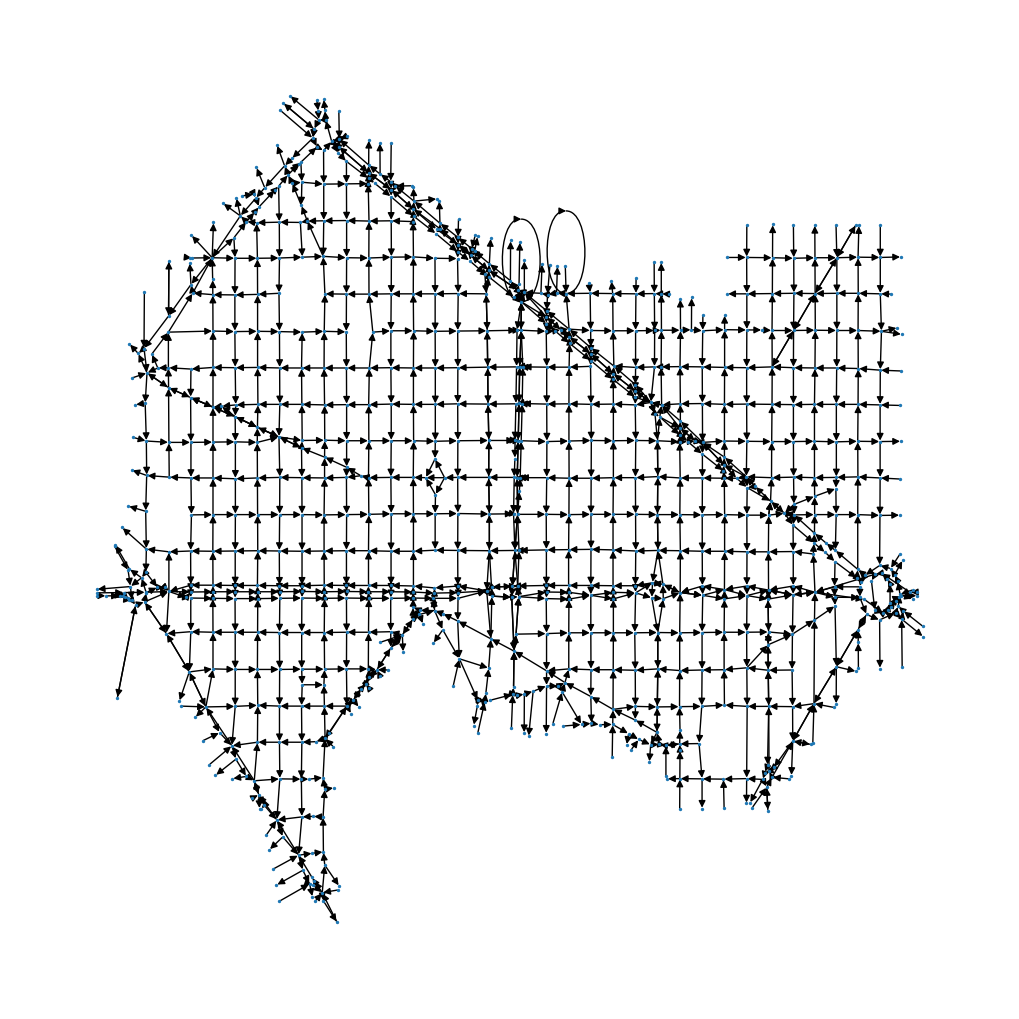

In [49]:
G = nx.from_pandas_edgelist(edges, 
                            source = "Starting node ID", 
                            target= "Ending node ID", 
                            edge_attr=["Length (m)", "Number of lanes", "Region"],
                            create_using=nx.MultiDiGraph)
plt.figure(figsize=(10,10))
nx.draw(G, node_size = 2, pos=nodes.transpose())
plt.show()

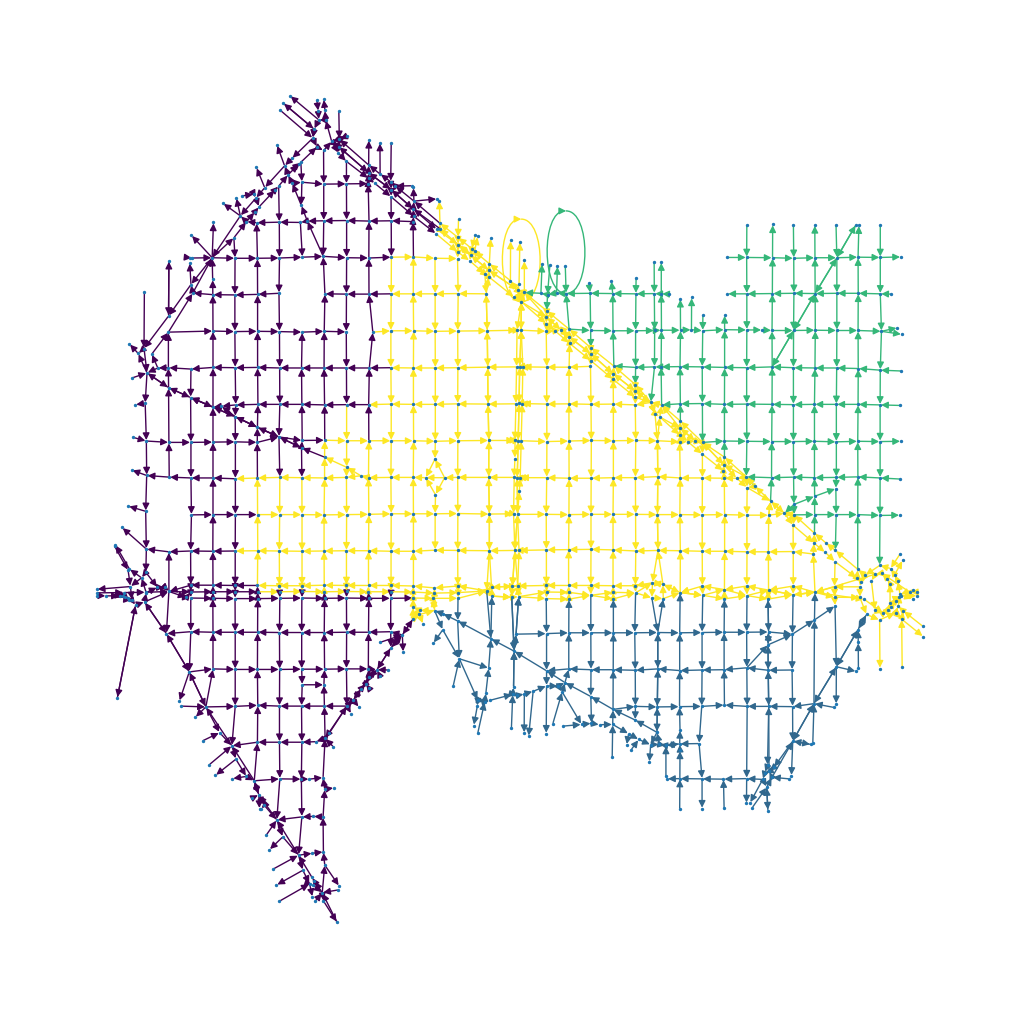

In [50]:
G = nx.from_pandas_edgelist(edges, 
                            source = "Starting node ID", 
                            target= "Ending node ID", 
                            edge_attr=["Length (m)", "Number of lanes", "Region"],
                            create_using=nx.MultiDiGraph)
plt.figure(figsize=(10,10))
nx.draw(G, node_size = 2, pos=nodes.transpose(), edge_color = list(nx.get_edge_attributes(G,"Region").values()))
plt.savefig("Pictures/Network_Regions.png")
plt.show()

## Adding occupancy

In [51]:
occupancy = pd.read_csv('Documentation/occupancy.csv', index_col = 0)

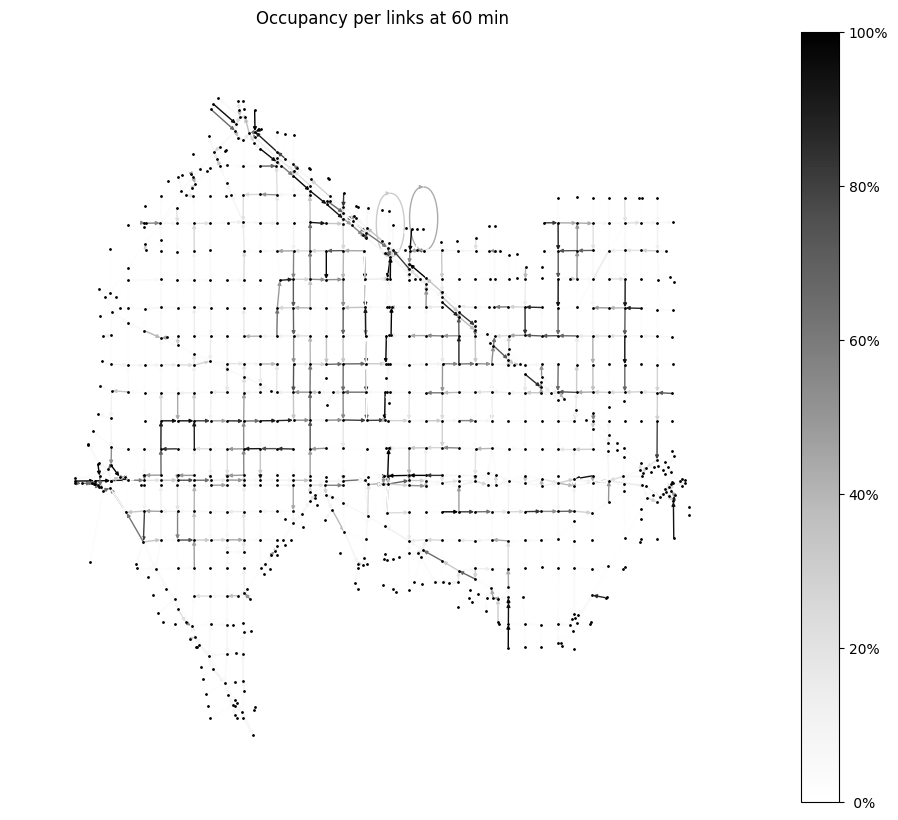

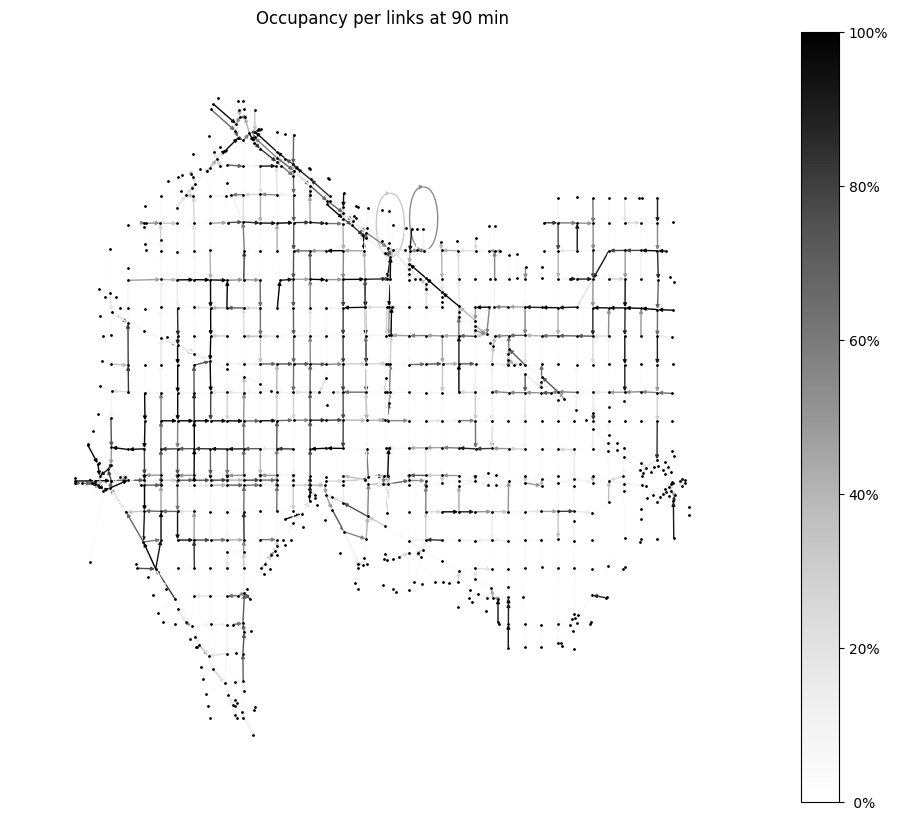

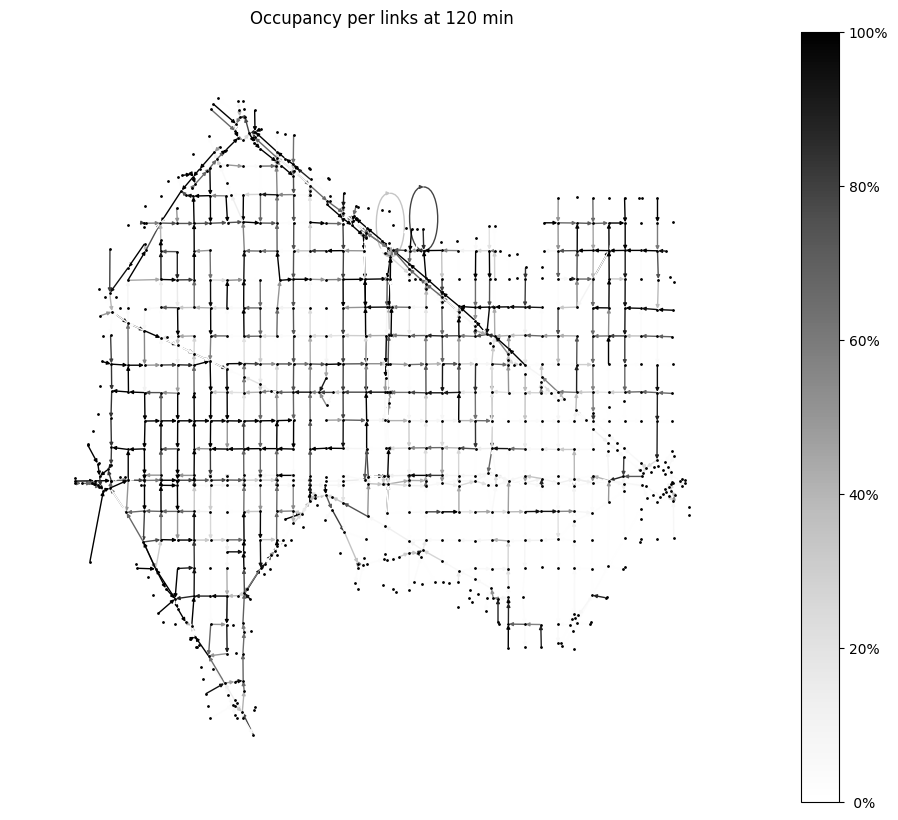

In [52]:
def plot_occupancy_at_t (time_in_minutes):
    time = time_in_minutes * 60
    occupancy_at_t = occupancy.loc[time]
    occupancy_at_t.name = "Occupancy"
    occupancy_at_t.index = occupancy_at_t.index.astype("int")
    edges_at_t = pd.concat((edges, occupancy_at_t),axis=1).copy(deep=True)

    G = nx.from_pandas_edgelist(edges_at_t, 
                                create_using = nx.MultiDiGraph, 
                                source = "Starting node ID", 
                                target= "Ending node ID", 
                                edge_attr=["Length (m)", "Number of lanes", "Region","Occupancy"])

    # Create a colormap
    cmap = plt.get_cmap('Greys')

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(f"Occupancy per links at {time_in_minutes} min")
    nx.draw(G, node_color="0", arrowsize=5, node_size=1, pos=nodes.transpose(), edge_cmap=cmap, edge_color=list(nx.get_edge_attributes(G,"Occupancy").values()), ax=ax)

    # Create the ScalarMappable
    sm = plt.cm.ScalarMappable(mcolors.Normalize(vmin = 0, vmax=100), cmap=cmap)

    # Add the colorbar
    cbar = plt.colorbar(sm, ax=ax, format="%2d%%")

for t in [60, 90, 120] :
    plot_occupancy_at_t(t)
    plt.savefig(f"Pictures/Gray_Scale_{t}min.png")
    plt.show()

## Step 2

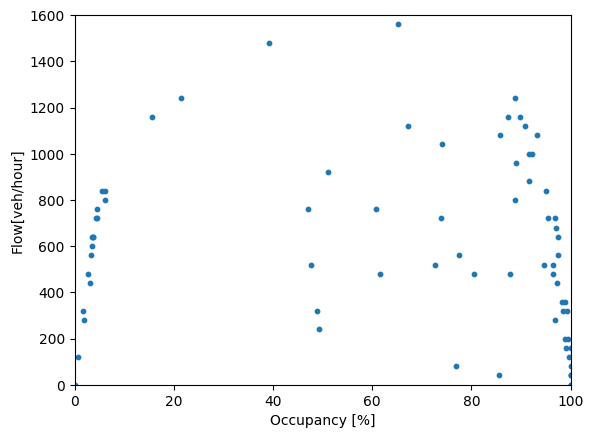

In [53]:
flow = pd.read_csv('Documentation/flow.csv', index_col = 0)

number_link = 514

flow_l = flow.loc[:, f'{number_link}']*3600/90
occpuancy_single_road = occupancy.loc[:, f'{number_link}']
#print(flow_l)
#print(flow.shape)
#print(occpuancy_single_road.shape)

plt.scatter(occpuancy_single_road, flow_l, s=10)
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()



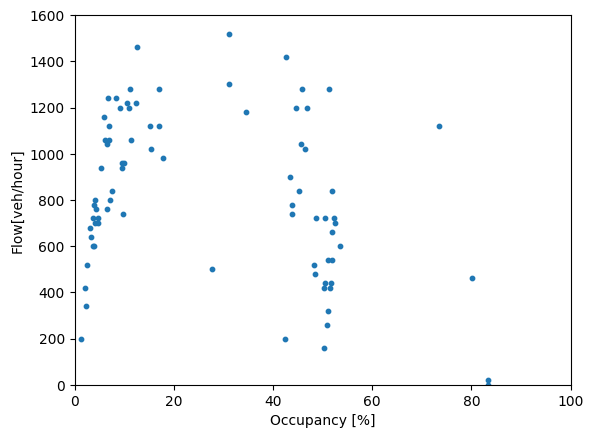

In [54]:
number_link = [516, 512]

        
flow_l= flow[[f'{number_link[0]}', f'{number_link[1]}']]

flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[[f'{number_link[0]}', f'{number_link[1]}']]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10)   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]") 
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()


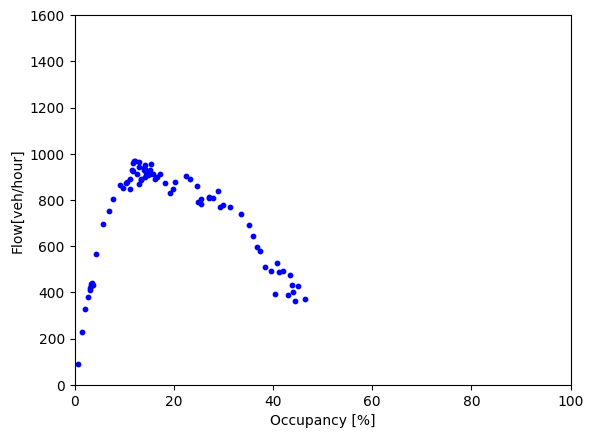

In [55]:
region = 1

number_link = []

for index in edges.index:
    if edges.loc[index]["Region"] == region:
        number_link.append(str(index))
       
flow_l= flow[number_link]
flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[number_link]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10, c="Blue")   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()

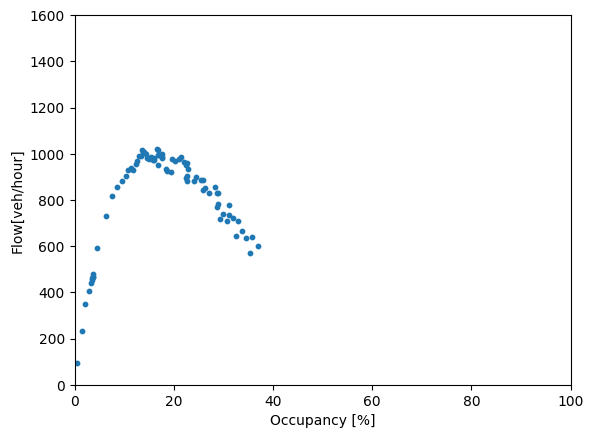

In [56]:
number_link = [ ]

for index in edges.index:
    
    number_link.append(str(index))

flow_l= flow[number_link]
flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[number_link]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10)   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
    
    

plt.show()

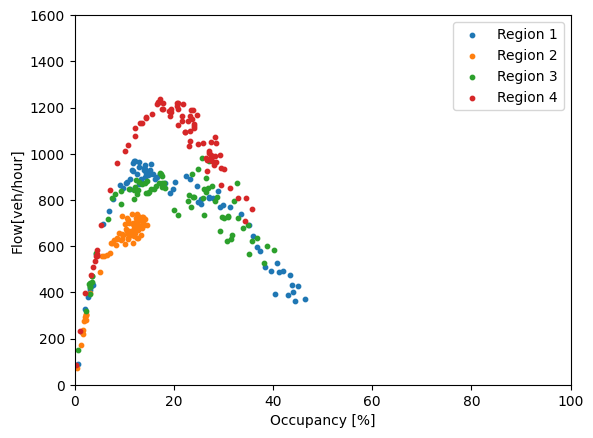

In [57]:
Region = [1,2,3,4]

for region in Region:

    number_link = []

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link.append(str(index))
        
    flow_l= flow[number_link]
    flow_mean = flow_l.mean(axis=1)*3600/90

    occupancy_l = occupancy[number_link]
    occupancy_mean = occupancy_l.mean(axis=1)

    plt.scatter(occupancy_mean, flow_mean, label=f'Region {region}', s= 10)   
    plt.xlabel("Occupancy [%]")
    plt.ylabel("Flow[veh/hour]")
    plt.xlim(0, 100)
    plt.ylim(0,1600)

plt.legend()
plt.show()

## Step 3

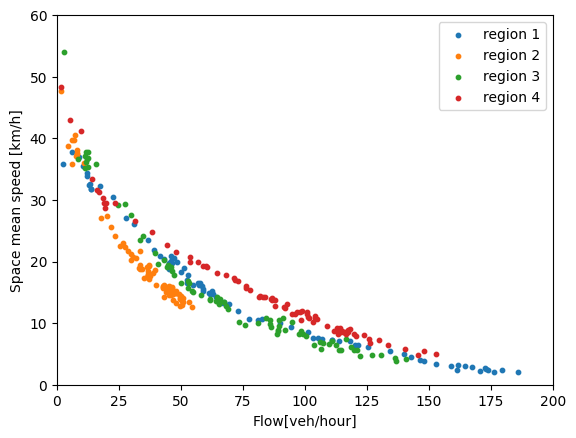

In [58]:
Region = [1,2,3,4]

for region in Region:


    number_link_int = []
    number_link_str = []

    L = 5/1000
    Ld = 2/1000

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link_int.append(int(index))
            number_link_str.append(str(index))

    number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
    length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


    occupancy_region = occupancy[number_link_str].to_numpy() 

    
    number_lane = np.diag(number_lane)

    density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)


    flow_region = flow[number_link_str].to_numpy()*3600/90


    link_speed = flow_region@np.transpose(density)


    length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


    mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)

 
    average_density = np.mean(density,axis=1)

    plt.scatter(average_density, mean_speed, label=f'region {region}', s=10)   
    
    plt.ylabel("Space mean speed [km/h]")
    plt.xlabel("Flow[veh/hour]")
    plt.xlim(0, 200)
    plt.ylim(0,60)
   
plt.legend()    
plt.show()

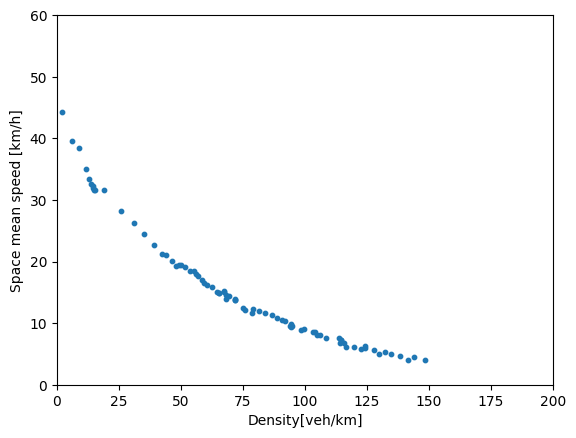

In [59]:

number_link_int = []
number_link_str = []

L = 5/1000
Ld = 2/1000

for index in edges.index:
    
    number_link_int.append(int(index))
    number_link_str.append(str(index))

number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


occupancy_region = occupancy[number_link_str].to_numpy() 

number_lane = np.diag(number_lane)


density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)



flow_region = flow[number_link_str].to_numpy()*3600/90



link_speed = flow_region@np.transpose(density)



length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)


average_density = np.mean(density,axis=1)

plt.scatter(average_density, mean_speed, s=10)   

plt.xlabel("Density[veh/km]")
plt.ylabel("Space mean speed [km/h]")
plt.xlim(0, 200)
plt.ylim(0,60)  
plt.show()

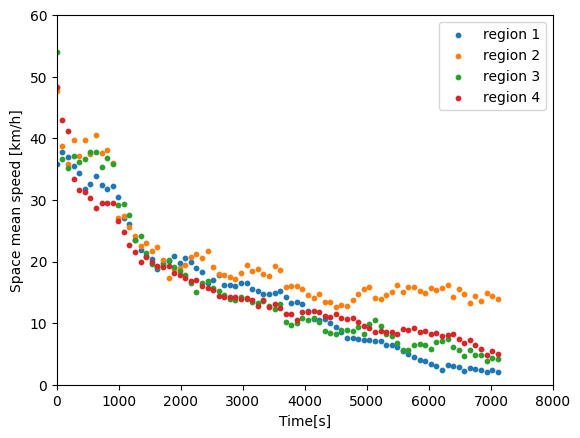

In [60]:
Region = [1,2,3,4]

t = np.arange(0,80)*90
for region in Region:


    number_link_int = []
    number_link_str = []

    L = 5/1000
    Ld = 2/1000

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link_int.append(int(index))
            number_link_str.append(str(index))

    number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
    length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


    occupancy_region = occupancy[number_link_str].to_numpy() 
    
    number_lane = np.diag(number_lane)


    density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)

    flow_region = flow[number_link_str].to_numpy()*3600/90


    link_speed = flow_region@np.transpose(density)


    length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


    mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)

    average_density = np.mean(density,axis=1)

    plt.scatter(t, mean_speed, label=f'region {region}', s=10)   
    
plt.ylabel("Space mean speed [km/h]")
plt.xlabel("Time[s]")
plt.xlim(0, 8000)
plt.ylim(0,60)  
   
plt.legend()    
plt.show()

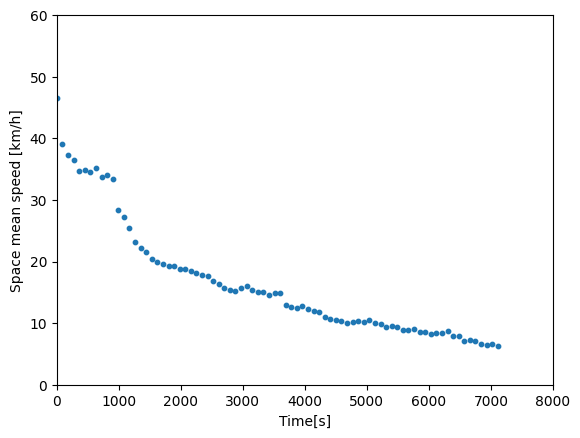

In [61]:
Region = [1,2,3,4]

t = np.arange(0,80)*90

mean_speed_mean = [[],[],[],[]]

for region in Region:


    number_link_int = []
    number_link_str = []

    L = 5/1000
    Ld = 2/1000

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link_int.append(int(index))
            number_link_str.append(str(index))

    number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
    length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


    occupancy_region = occupancy[number_link_str].to_numpy()
    number_lane = np.diag(number_lane)

    density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)



    flow_region = flow[number_link_str].to_numpy()*3600/90


    link_speed = flow_region@np.transpose(density)


    length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


    mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)

 
    mean_speed_mean[region-1] = mean_speed

mean_speed_mean = np.array(mean_speed_mean)

mean_speed_mean = np.mean(mean_speed_mean, axis=0)


plt.ylabel("Space mean speed [km/h]")
plt.xlabel("Time[s]")
plt.xlim(0, 8000)
plt.ylim(0,60)  
   
plt.scatter(t, mean_speed_mean, s =10)       
plt.show()

## Step 4

In [62]:
def density_link(link):
    L = 5/1000
    Ld = 2/1000
    number_lane = edges.loc[link, "Number of lanes"]
    occupancy_link = occupancy[str(link)] #%
    density = occupancy_link / 100 * number_lane / (L + Ld)
    return density

def accumulation_link(link):
    length = edges.loc[link, "Length (m)"]
    density = density_link(link)
    accumulation = length * density
    return accumulation
    
def production_link(link):
    length = edges.loc[link, "Length (m)"]
    volume = flow.loc[:, f'{link}'] * 3600 / 90 # Same volume as in part 2
    production = volume * length
    return production

def accumulation_2links(links):
    accumulations = []

    for link in links:
        acc = accumulation_link(link)
        accumulations.append(acc.to_numpy())

    return accumulations

def production_2links(links):
    productions = []

    for link in links:
        prod = production_link(link)
        productions.append(prod.to_numpy())
    
    return productions

def accumulation_region(region):
    accumulations = []
    links = []

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            links.append(int(index))

    for link in links:
        acc = accumulation_link(link)
        accumulations.append(acc.to_numpy())

    return accumulations  

def production_region(region):
    productions = []
    links = []

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            links.append(int(index))

    for link in links:
        prod = production_link(link)
        productions.append(prod.to_numpy())
        
    return productions 


4.1 - Single link

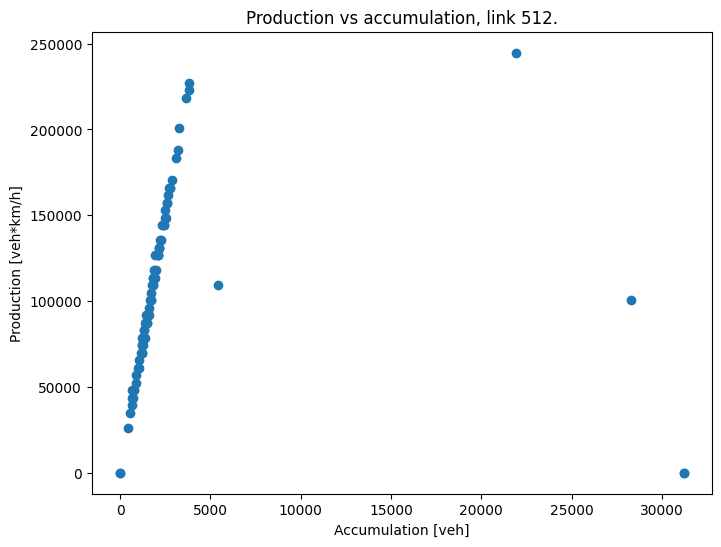

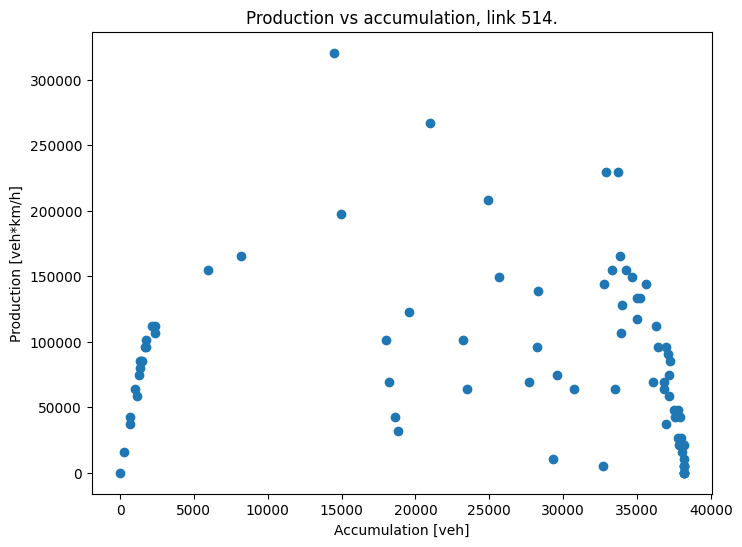

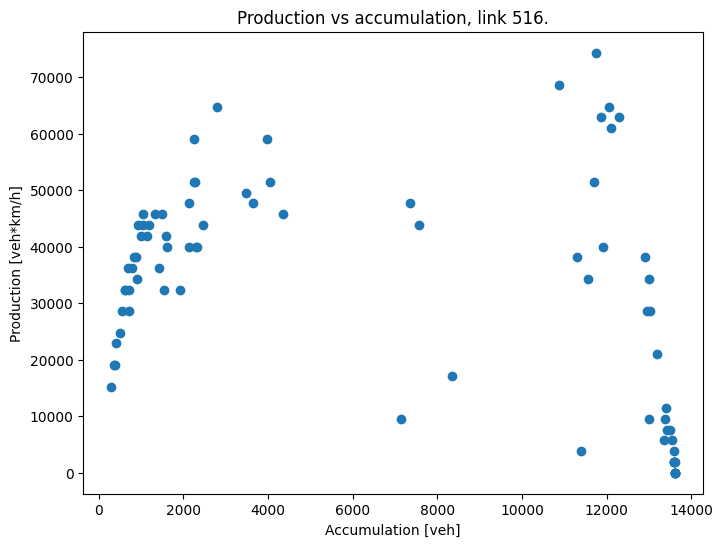

In [63]:
links = [512, 514, 516]

for link in links:
    plt.figure(figsize=(8,6))
    plt.title(f'Production vs accumulation, link {link}.')
    plt.scatter(accumulation_link(link), production_link(link))
    plt.xlabel('Accumulation [veh]')
    plt.ylabel('Production [veh*km/h]')
    plt.show()

4.2 - Two links

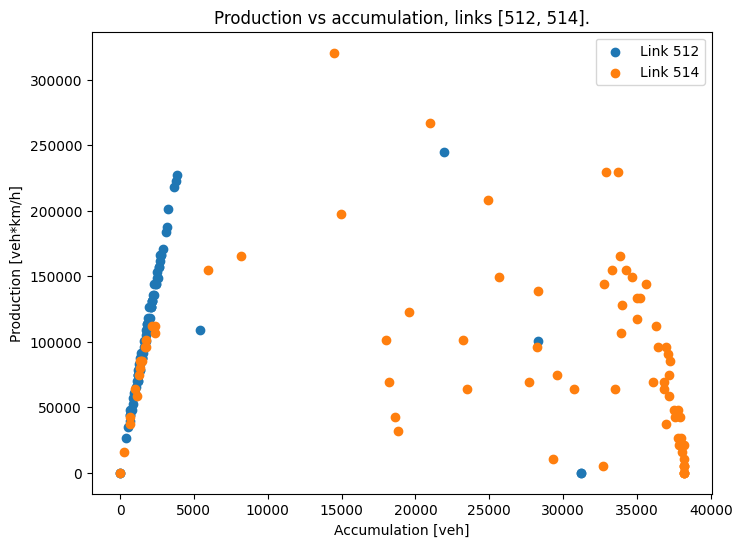

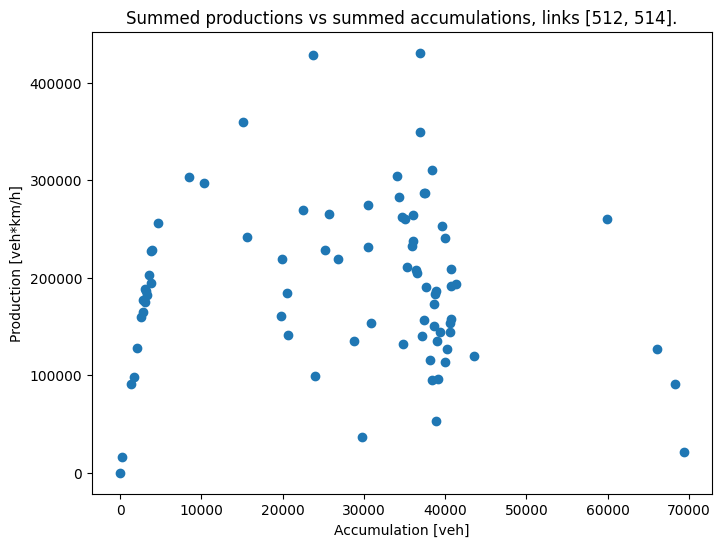

In [64]:
links = [512, 514]

accumulations = []
productions = []

summed_accumulations = []
summed_productions = []

accumulations = accumulation_2links(links)
productions = production_2links(links)

summed_accumulations = np.sum(accumulations, axis = 0)
summed_productions = np.sum(productions, axis = 0)


plt.figure(figsize=(8,6))
plt.title(f'Production vs accumulation, links {links}.')
for i in range(len(links)):
    plt.scatter(accumulations[i], productions[i], label = f'Link {links[i]}')
plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.title(f'Summed productions vs summed accumulations, links {links}.')
plt.scatter(summed_accumulations, summed_productions)
plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
plt.show()

4.3 - All regions

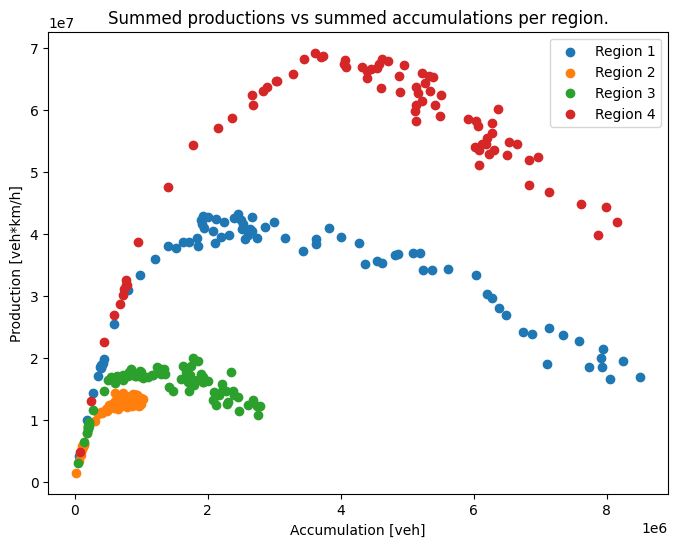

In [65]:
regions = [1,2,3,4]

plt.figure(figsize=(8,6))
plt.title(f'Summed productions vs summed accumulations per region.')

for region in regions:
    summed_accumulations = np.sum(accumulation_region(region), axis = 0)
    summed_productions = np.sum(production_region(region), axis = 0)
    plt.scatter(summed_accumulations, summed_productions, label = f"Region {region}")

plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
plt.legend()
plt.show()

## Step 5